# **IMPORT PACKAGES**

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# **READ DATASET**

In this project, I've obtained the dataset from Kaggle, which is available at the following link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/SOSMED DIGITAL/Data "
"Scientist/Regression/hotel_bookings.csv",sep=",")

# **EDA**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Look at the comparison between the number of customers who canceled or continued their orders.**

<Axes: ylabel='is_canceled'>

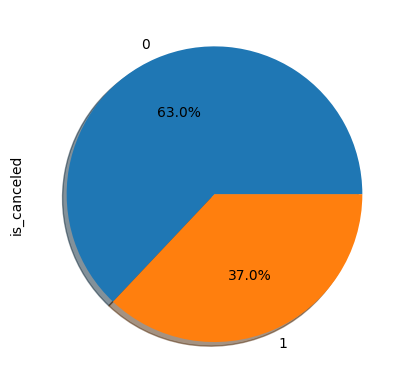

In [ ]:
df["is_canceled"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)

From the above chart, it can be concluded that based on the available data, 63% of customers proceeded with their orders, while a significant number, 37%, opted for cancellations

##**Find out the profiling of customers.**

To find out from which countries the customers are

To discover customer profiling, filter customers who have successfully placed orders (without cancellations).

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Country with the Most Customers"
dforder = df[['country']][df["is_canceled"]==0].value_counts().sort_values(ascending=False)
dforder.head()

country
PRT        21071
GBR         9676
FRA         8481
ESP         6391
DEU         6069
dtype: int64

In [ ]:
#Number of Countries with the Fewest Customers
dforder = df[['country']][df["is_canceled"]==0].value_counts().sort_values(ascending=True)
dforder.head()

country
PLW        1
SDN        1
DJI        1
ZMB        1
AIA        1
dtype: int64

In [ ]:
#Review countries with the highest number of orders based on hotel types.
country = df[['hotel','country']][df["country"].
                                  isin(["PRT","GBR","FRA","ESP","DEU"])].value_counts().sort_values(ascending=False)
country

hotel         country
City Hotel    PRT        30960
Resort Hotel  PRT        17630
City Hotel    FRA         8804
Resort Hotel  GBR         6814
City Hotel    DEU         6084
              GBR         5315
              ESP         4611
Resort Hotel  ESP         3957
              FRA         1611
              DEU         1203
dtype: int64

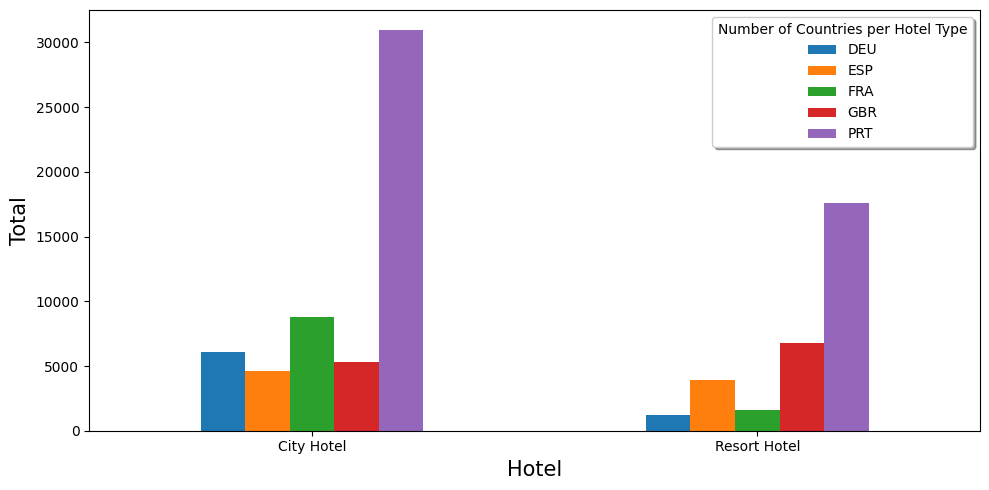

In [ ]:
country.unstack().plot(kind='bar')
plt.xlabel('Hotel',fontsize=15)
plt.ylabel('Total',fontsize=15)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,
           title='Number of Countries per Hotel Type')
plt.ylim(ymin=0)
label,location = plt.yticks()
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

Characteristics in hotel bookings observed based on resort hotels and city hotels.

In [ ]:
colors = px.colors.qualitative.Pastel

presentase_customer = df[df["is_canceled"] == 0].groupby(["hotel"])['hotel'].count()

fig = px.pie(presentase_customer,
             names=presentase_customer.index,
             values=presentase_customer.values,
             title='Characteristics in Hotel Bookings',
             hole=0.1,
             height=200,
             color_discrete_sequence=colors)

fig.update_layout(margin=dict(l=0, r=0, t=40, b=0), showlegend=True)

fig.show()

##To find out the characteristics of customers who cancel.

In [ ]:
cscancaled = df[df["is_canceled"]==0]
cscancaled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


To find out based on hotel types.

In [ ]:
colors = px.colors.qualitative.Pastel

fig = px.pie(df[df["is_canceled"] == 0],
             names='hotel',
             title='Characteristics in Hotel Cancellations',
             hole=0.1,
             height=300,
             color_discrete_sequence=colors,
             opacity=0.7)

fig.show()

# **DATA PRE-PROCESSING**

##Handling Null Value

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df["company"].fillna("0",inplace=True)
df.dropna(subset=['country','agent','children'],inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

## Change Data Category and Check Data Correlation

In [ ]:
#kategori = df.select_dtypes(include=['object']).copy()
category = df[["hotel","meal","country","market_segment","assigned_room_type",
               "reserved_room_type","deposit_type","customer_type"]]


In [ ]:
encoded_data = LabelEncoder()
for feature in category:
        if feature in df.columns.values:
            df[feature+"_cat"] = encoded_data.fit_transform(df[feature])

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,hotel_cat,meal_cat,country_cat,market_segment_cat,assigned_room_type_cat,reserved_room_type_cat,deposit_type_cat,customer_type_cat
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,1,0,59,2,0,0,0,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,1,0,59,6,0,0,0,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,1,0,59,6,0,0,0,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,1,1,134,3,2,2,0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Canceled,2015-05-06,1,0,134,6,0,0,0,2


In [ ]:
df['adr']

3          75.00
4          98.00
5          98.00
7         103.00
8          82.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 102894, dtype: float64

In [ ]:
df['company'] = df['company'].astype(float)

In [ ]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df['arrival_date_month_cat'] = df['arrival_date_month']
df['arrival_date_month_cat'].replace(to_replace='January', value=1, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='February', value=2, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='March', value=3, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='April', value=4, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='May', value=5, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='June', value=6, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='July', value=7, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='August', value=8, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='September', value=9, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='October', value=10, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='November', value=11, inplace=True)
df['arrival_date_month_cat'].replace(to_replace='December', value=12, inplace=True)

In [ ]:
df['arrival_date_month_cat'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

<ipython-input-39-0ff9f66e7b58>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



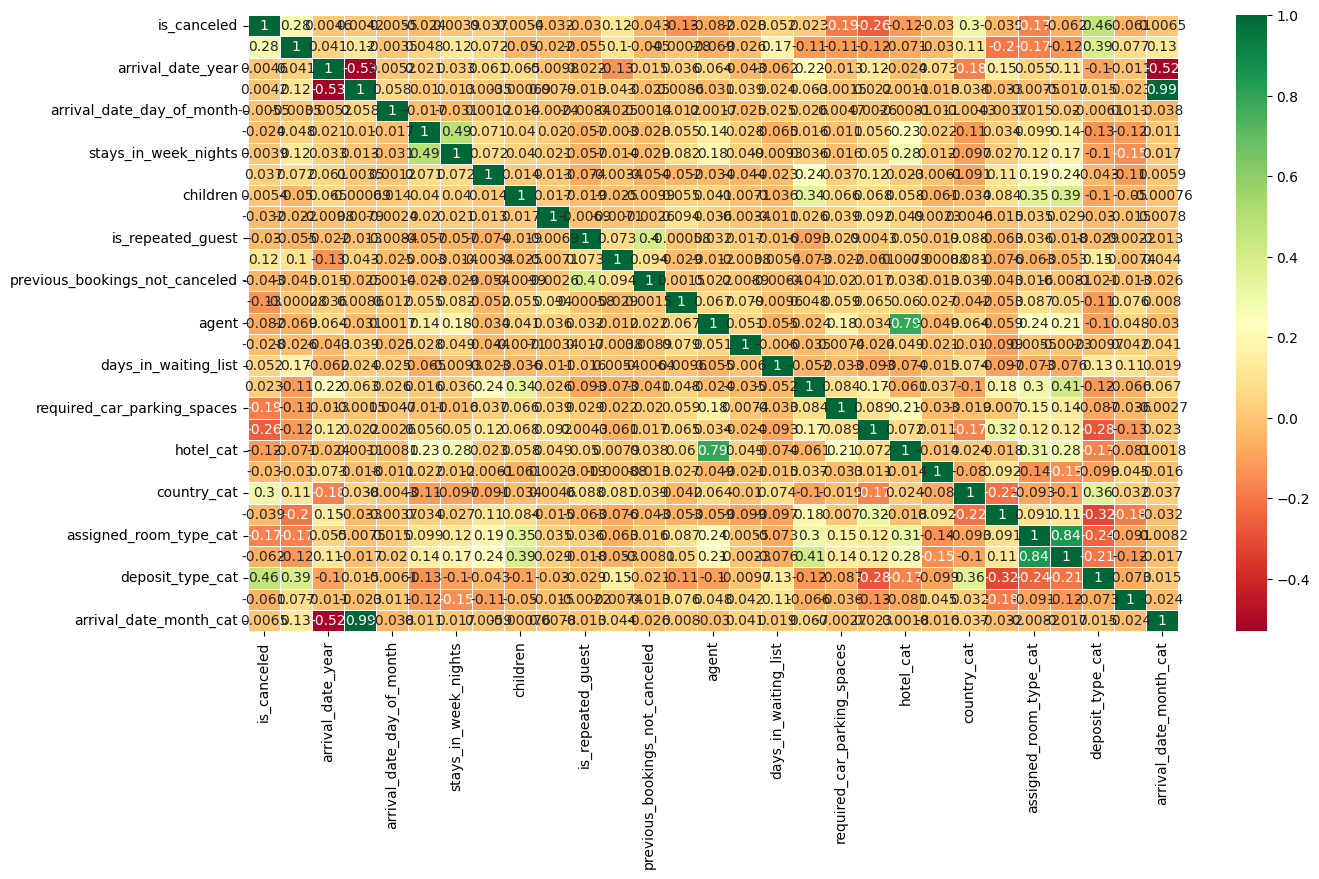

In [ ]:
#Check with a heatmap
sns.heatmap(df.corr(),linewidth=.5,annot=True,cmap="RdYlGn")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
correlation = df.corr()["is_canceled"].sort_values()
correlation

<ipython-input-40-90075e648b86>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



total_of_special_requests        -0.257934
required_car_parking_spaces      -0.188298
assigned_room_type_cat           -0.165903
booking_changes                  -0.131714
hotel_cat                        -0.116237
agent                            -0.081939
reserved_room_type_cat           -0.061794
customer_type_cat                -0.060653
previous_bookings_not_canceled   -0.042589
market_segment_cat               -0.038758
babies                           -0.032038
meal_cat                         -0.030191
is_repeated_guest                -0.029913
company                          -0.027753
stays_in_weekend_nights          -0.023589
arrival_date_day_of_month        -0.005468
stays_in_week_nights              0.003918
arrival_date_week_number          0.004172
arrival_date_year                 0.004561
children                          0.005409
arrival_date_month_cat            0.006457
adr                               0.023284
adults                            0.037057
days_in_wai

The deposit type has the highest correlation, followed by country, lead_time  and previous cancellations.

#FEATURE ENGINEERING

In [ ]:
features = df[["is_canceled","deposit_type_cat","lead_time",
               "country_cat","previous_cancellations","days_in_waiting_list",
               "arrival_date_month_cat","arrival_date_week_number"]]

In [ ]:
features.head()

,is_canceled,deposit_type_cat,lead_time,country_cat,previous_cancellations,days_in_waiting_list,arrival_date_month_cat,arrival_date_week_number
3,0,0,13,59,0,0,7,27
4,0,0,14,59,0,0,7,27
5,0,0,14,59,0,0,7,27
7,0,0,9,134,0,0,7,27
8,1,0,85,134,0,0,7,27


In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(features)
data_scaled = pd.DataFrame(scaled,columns=["is_canceled","deposit_type_cat",
                                           "lead_time","country_cat",
                                           "previous_cancellations","days_in_waiting_list",
                                           "arrival_date_month_cat","arrival_date_week_number"])
data_scaled

,is_canceled,deposit_type_cat,lead_time,country_cat,previous_cancellations,days_in_waiting_list,arrival_date_month_cat,arrival_date_week_number
0,0.0,0.0,0.020668,0.341040,0.0,0.0,0.545455,0.500000
1,0.0,0.0,0.022258,0.341040,0.0,0.0,0.545455,0.500000
2,0.0,0.0,0.022258,0.341040,0.0,0.0,0.545455,0.500000
3,0.0,0.0,0.014308,0.774566,0.0,0.0,0.545455,0.500000
4,1.0,0.0,0.135135,0.774566,0.0,0.0,0.545455,0.500000
...,...,...,...,...,...,...,...,...
102889,0.0,0.0,0.036566,0.086705,0.0,0.0,0.636364,0.653846
102890,0.0,0.0,0.162162,0.323699,0.0,0.0,0.636364,0.653846
102891,0.0,0.0,0.054054,0.248555,0.0,0.0,0.636364,0.653846
102892,0.0,0.0,0.173291,0.341040,0.0,0.0,0.636364,0.653846


#MODELING

In [ ]:
X = data_scaled.drop('is_canceled', axis=1)
y = data_scaled['is_canceled']

X_train, X_test, y_train,y_test= train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True,
                       right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,deposit_type_cat,lead_time,country_cat,previous_cancellations,days_in_waiting_list,arrival_date_month_cat,arrival_date_week_number,is_canceled,prediction
62004,0.0,0.162162,0.341040,0.0,0.0,0.636364,0.596154,1.0,0.0
83235,0.0,0.176471,0.959538,0.0,0.0,0.727273,0.711538,0.0,0.0
80827,0.0,0.435612,0.086705,0.0,0.0,0.636364,0.615385,0.0,0.0
2950,0.0,0.414944,0.341040,0.0,0.0,1.000000,0.961538,0.0,0.0
19560,0.0,0.193959,0.248555,0.0,0.0,0.454545,0.423077,0.0,0.0


#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :',accuracy)

accuracy : 0.743962291656543


In [ ]:
from sklearn.metrics import precision_score
precission = precision_score(y_test,y_pred)
print('Precision : ',precission)

Precision :  0.9210992907801419


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
print('recall : ',recall)

recall :  0.383914275157039


In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred)
print('F1 Score : ',f1score)

F1 Score :  0.5419455794140658


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix : ')
print(cm)

Confusion matrix : 
[[12193   267]
 [ 5002  3117]]


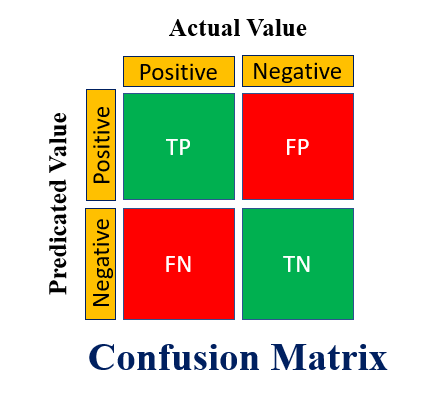


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.98      0.82     12460
         1.0       0.92      0.38      0.54      8119

    accuracy                           0.74     20579
   macro avg       0.82      0.68      0.68     20579
weighted avg       0.79      0.74      0.71     20579



A classification report is a document that provides statistical insights into how well a classification model performs. In this report, several key metrics are presented, including:

**Precision:** How well the model can identify positive instances without making false positive predictions. This metric helps measure how "precise" the model is in classifying data.

**Recall:** How well the model can detect all true positive instances. This metric helps measure how "sensitive" or "comprehensive" the model is in capturing all cases that should be positive.

**F1-Score:** It is the harmonic mean between precision and recall. This is beneficial as it provides a balance between precision and recall, useful when we cannot ignore either false positives or false negatives.

**Support:** The number of instances or samples in each class. This provides context about how common or rare a class is in the dataset.

Simply put, a classification report is a document that informs us how well a computer or model can recognize different classes. In this report, we can observe:<br>

**Precision**: How accurately the model predicts a specific class.<br>
**Recall**: How well the model captures all instances of a particular class.<br>
**F1-Score**: An average value that encompasses both precision and recall.<br>
**Support**: The number of examples in each class.

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score, roc_curve
import plotly.express as px

# Assuming y_test and y_pred are defined earlier

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve',
                  xaxis=dict(title='False Positive Rate (FPR)'),
                  yaxis=dict(title='True Positive Rate (TPR)'),
                  legend=dict(x=0.7, y=0.1),
                  width=600, height=400)

fig.show()

ROC AUC Score: 0.6812428518642337


The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is a metric used to evaluate the performance of a binary classification model. It provides a single value that represents the model's ability to distinguish between the positive and negative classes. Here's an explanation of the value that provided:<br><br>

ROC AUC Score: 0.6812428518642337<br>

The ROC AUC score ranges between 0 and 1.<br><
A score closer to 1 indicates better performance, suggesting that the model has a good ability to distinguish between the positive and negative classes.<br><br>
A score of 0.5 suggests that the model performs no better than random chance.<br><br>
In this case, a ROC AUC score of approximately 0.68 indicates a moderate ability of model to discriminate between positive and negative instances. While it's not exceptionally high, it's still better than random guessing (which would yield a score of 0.5). Further analysis and consideration of precision, recall, and other metrics may be necessary to get a comprehensive understanding of the model's performance

#Model Validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LR, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validation scores: {:.3f}".format(scores.mean()))
# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Cross-validation scores: 0.744
Mean Accuracy: 0.7441
Standard Deviation: 0.0031


The mean of the cross-validation scores, in the context of machine learning, represents the average performance of the model across different folds or subsets of the training data. In your case:<br>

Cross-Validation Scores: 0.744<br>
Mean Accuracy: 0.744<br>

This means that, on average, the logistic regression model achieved an accuracy of approximately 74.4% across the different folds in the cross-validation process. The mean serves as a summary statistic, providing insight into the overall performance of the model when tested on different subsets of the training data.

#LOAD AND PREDICT NEW DATA

In [ ]:
features = df[["is_canceled","deposit_type_cat","lead_time","country_cat",
               "previous_cancellations","days_in_waiting_list",
               "arrival_date_month_cat","arrival_date_week_number"]]

In [ ]:
type_of_deposit = int(input('Is there a type of deposit?'))# No Deposit = 0, Non-Refundable = 1, Refundable = 2
waiting_time = int(input('Enter waiting time'))  # 7
country = int(input('Enter country code'))  # PRT = 135
previous_cancellations = int(input("Input previous cancellations"))  # 0
days_in_waiting_list = int(input("Input days in waiting list"))  # 0
arrival_week_number = int(input("Input arrival week number"))  # 27
arrival_date_month_cat  = int(input("Input arrival_date_month_cat"))
# Best model
new_data = np.array([[type_of_deposit, waiting_time, country,
                      previous_cancellations,
                      days_in_waiting_list,
                      arrival_date_month_cat,
                      arrival_week_number]])

prediction = LR.predict(new_data)

if prediction == 0:
    print("Customer did not cancel the reservation")
else:
    print("Customer canceled the reservation")


Is there a type of deposit?0
Enter waiting time7
Enter country code135
Input previous cancellations0
Input days in waiting list0
Input arrival week number27
Input arrival_date_month_cat2
Customer canceled the reservation


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

